# LAB 5 - Wide and Deep Neural Networks


   ### Eli Laird

## Introduction

In this lab, I will be created a Risk Assessment solution used for identifying delinquent loans found in the Lending Club loans dataset. Lending Club is a peer-to-peer lending company that matches lenders to borrowers through the internet. I will use a Wide and Deep Neural Network to complete this prediction task and will also compare with a standard Multilayer Perceptron.

## Business Understanding

##### Motivation

Credit risk models the probability of loss due to a borrower's failure to make payments on any type of debt. [1] Many banks and businesses will attempt to mitigate losses by observing the state of the institution's capital and loan reserves. This process of Credit Risk Management is carried out by thorough risk assessments which permit institutions to know if their capital reserves accurately reflect risks and if loan reserves cover short-term credit losses. These credit/loan reserves act as a backup in the case that the credit or loan defaults, meaning that the borrower fails to pay back the loan. In the case of a default, the institution uses these reserves to pay for the losses until the borrower finally pays the loan. When an institution fails to manage the risk of their assets, they will be under the influence that their reserves accurately cover all potential losses that could occur, when in reality their reserves fail to cover the losses and the institution loses capital.

To successfully manage risk it is important to use a risk assessment solution that can accurately identify risk. Since credit risk is the probability of a loan defaulting, our goal is to predict whether or not given loans are delinquent, meaning they have a high probability of defaulting. It is critical in managing risk to be able to identify loans that have high probabilities of defaulting. The ability to identify delinquent loans will assist institutions in appropriately preparing loan reserves to cover potential losses. Not only does one need a risk assessment solution to find potential risks, it is also important for this solution to be scalable to an entire enterprise. Managing the risk of a small sector of an enterprise will leave risks in unmanaged sectors unchecked, thus increasing the likelihood of the enterprise acquiring losses. To summarize, our solution must accurately identify delinquent loans and also be able to apply to the enterprise level. 

##### Solution

To satisfy the previously stated requirements for a successful risk assessment solution, our solution design is a Wide and Deep Neural Network that will identify risks by classifying loans as either delinquent or secure. The Wide and Deep Neural Network architecture not only provides the capability to indentify credit risks, but also offers scalability. This scalability is provided by the combined effort of both the Wide and Deep networks. The Wide network will be able to "memorize" specific occurences that rarely occur and do not generalize well.  For example, the Wide segment of the network would be able to learn that a loan with specific features such as being borrowed by a college student, without employment, and low annual income has a high likelihood of default. On the other hand, the Deep segment is able complement the Wide network by generalizing well to the input data. This generalization will aid in scaling the solution to large enterprises. An enterprise can then use this solution to identify specific risks that may happen in certain sectors of the enterprise with the Wide network as well as identify risks that occur accross the board with the Deep network. 


##### Evaluation

In this scenario of risk management, we need our risk assessment solution to correctly classify all loans that are likely to default so that the institution can take preventative measures, such as preparing the loan reserves, in order to cover the credit. For this secenario, misclassifying a secure loan as a delinquent loan is not a high cost because it's better for a bank to be more prepared than less prepared to cover losses. However, misclassifying a delinquent loan as a secure loan comes at a high cost because the bank will fail to properly prepare the loan reserves and will lose capital. Because we care the most about correctly classifying delinquent loans and can live with having false positives, we will use an accuracy measure to evaluate our model. The accuracy score measures the models overall correctness and is shown below.
$$
\begin{align}
Accuracy = \frac{True Positive + True Negative}{(True Positive + False Postive + True Negative + False Negative)}
\end{align}
$$



## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

loans = pd.read_csv('./data/loan.csv')


loans.head()

/Users/eli/anaconda3/envs/mlenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <center> Data Descriptions </center>
    
|Feature | Data Type | Description  |
|-------|---------------|----------|
|loan_amnt:| continuous| The listed amount of the loan applied for by the borrow|
|term:| 36 Months, 60 Months| The number of payments on the loan|
|int_rate:| continuous| The interest rate on the loan|
|grade:| A, B, C, D, E, F, G| Loan quality score based on borrower's credit history, quality of collateral, and likelihood of repayment|
|emp_length: | < 1 year, 1 year, 2 years,..., 10+ years| Employment length in years|
|home_ownership: | RENT, OWN, MORTGAGE, OTHER, NONE, ANY| The home ownership status provided by the borrower during registration|
|annual_inc: | continuous| The self-reported annual income provided by the borrower during registration|
|**loan_status**: | Delinquent, Secure| Current status of the loan|


----


### Exploratory Data Analysis 

In [2]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [3]:
features = ['loan_amnt','term','int_rate','grade',
            'emp_length', 'home_ownership','annual_inc','loan_status']

loans_data = loans[features]

loans_data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status
0,5000.0,36 months,10.65,B,10+ years,RENT,24000.0,Fully Paid
1,2500.0,60 months,15.27,C,< 1 year,RENT,30000.0,Charged Off
2,2400.0,36 months,15.96,C,10+ years,RENT,12252.0,Fully Paid
3,10000.0,36 months,13.49,C,10+ years,RENT,49200.0,Fully Paid
4,3000.0,60 months,12.69,B,1 year,RENT,80000.0,Current


##### Observe unique values of target variable: 'loan_status'

In [4]:
print("Unique value count for 'loan_status' {}".format(loans_data['loan_status'].nunique()))
print("Unique values for 'loan_status' {}".format(loans_data['loan_status'].unique()))

Unique value count for 'loan_status' 10
Unique values for 'loan_status' ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off' 'Issued']


In [5]:
loans_data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

* We will be predicting loans as either delinquent or secure. Loans that are identified as 'Default', 'Charged off', or 'Late...' will identify loans that are risky. A loan that is 'charged off' is a loan that the lender has essentially given up on collecting. These charged off loans occur when a borrower is significantly behind on their payments and is very unlikely to pay back the loan. 'Late' and 'Default' loans are obvious occurences of a delinquent loan, meaning that are behind on payments or completely defaulted on the payments. 

In [6]:
loan_status = ['Default','Fully Paid','Charged Off','Late (31-120 days)', 'Late (16-30 days)']
loans_data = loans_data[loans_data['loan_status'].isin(loan_status)]

loans_data['loan_status'].value_counts()

Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

#### Observe unique values of feature variables

In [7]:
print("Unique 'grade' values: ", loans_data['grade'].unique())
print("Unique 'emp_length' values: ", loans_data['emp_length'].unique())
print("Unique 'home_ownership' values: ", loans_data['home_ownership'].unique())
print("Unique 'term' values: ", loans_data['term'].unique())

Unique 'grade' values:  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Unique 'emp_length' values:  ['10+ years' '< 1 year' '3 years' '9 years' '4 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years' nan]
Unique 'home_ownership' values:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
Unique 'term' values:  [' 36 months' ' 60 months']


#### Distributions of Categorical Variables

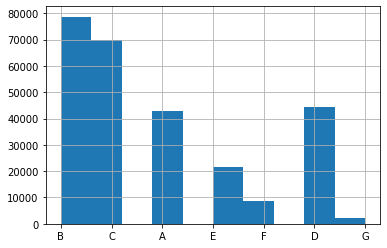

In [8]:
#plot distribution of grades
loans_data['grade'].hist()

>From the distribution above, we can see that nearly half of the loans graded as "B" or "C" loans, meaning that they are ranked farely well in regards to security. There is also a large amount of "D" rated loans. "D" rated loans are insecure and would be regarded as unsafe to manage. Inferring that the grade of the loan represents how "safe" it is to manage, the grade feature will be valuable in predicting defaulting loans.

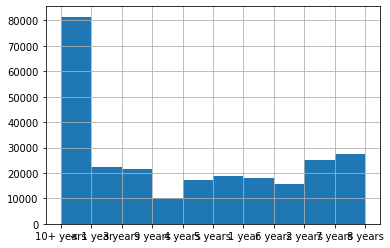

In [9]:
#plot distribution of emp_length
loans_data['emp_length'].hist()

>From the distribution of the years of employment for the borrowers of the loans, we can see that there is a mostly even distribution of employment except for the large amount of borrowers with more than 10 years of employment. This large spike for 10 or more years of employment is likely due to fact that when you observe the population as a whole, there are going to be more people with more than 10 years of employment than people with less. Therefore it makes sense that a large portion of this sample of borrowers have been employed more than 10 years. The more years employed offers valuable insight into whether the borrower will default based on the emprical evidence that more experience often leads to more success. 

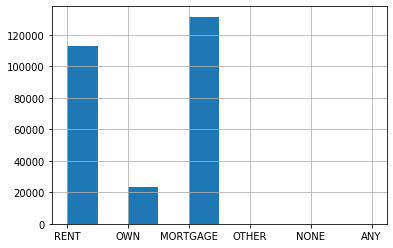

In [10]:
loans_data['home_ownership'].hist()

>The distribution above provides insight into how many borrowers currently rent, own, or mortgage their home. Most borrowers mortgage their home and the second most rent their home. Home ownership could be a valuable feature in predicting default. One hypothesis would state that borrowers that own their home are less likely to default because they were successful in paying of their home. While another hypothesis would indicate that borrowers that rent or mortgage their homes are likely to pay off their loans due to the experience of paying mortgage loans. There are many ways this variable can relate to defaulting, regardless, home ownership will provide insight into predicting defaulting loans. 

In [11]:
loans_data['home_ownership'].value_counts()

MORTGAGE    131462
RENT        112924
OWN          23567
OTHER          141
NONE            43
ANY              1
Name: home_ownership, dtype: int64

#### Find and Remove NaNs


In [12]:
loans_data.isnull().sum()

loan_amnt             0
term                  0
int_rate              0
grade                 0
emp_length        10829
home_ownership        0
annual_inc            0
loan_status           0
dtype: int64

In [13]:
#remove nans
null_mask = loans_data[loans_data['emp_length'].isnull()].index
loans_data.drop(null_mask, inplace=True)
loans_data['emp_length'].isnull().sum()

0

There were only 10829 nan values in the dataset which in comparison to the large size of the dataset, around 200k instances, is miniscule. I also decided to remove the nan values because for the employment length feature, there is no valuable way to impute the values without introducing bias.


#### Encode Categorical Values and Scale Numeric Values

In [14]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257309 entries, 0 to 887369
Data columns (total 8 columns):
loan_amnt         257309 non-null float64
term              257309 non-null object
int_rate          257309 non-null float64
grade             257309 non-null object
emp_length        257309 non-null object
home_ownership    257309 non-null object
annual_inc        257309 non-null float64
loan_status       257309 non-null object
dtypes: float64(3), object(5)
memory usage: 17.7+ MB


In [15]:
loans_data['loan_status']

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
5          Fully Paid
             ...     
887347     Fully Paid
887351    Charged Off
887364     Fully Paid
887366     Fully Paid
887369     Fully Paid
Name: loan_status, Length: 257309, dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoders = dict()
cat_features = ['term','grade','emp_length','home_ownership']


#encode target variable
loan_status = {"loan_status": {"Default":1,"Charged Off":1, "Late (31-120 days)":1, "Late (16-30 days)":1, 
                                                                                         "Fully Paid": 0}}
loans_data.replace(loan_status, inplace=True)

#train categorical encoders
for col in cat_features:
    loans_data[col] = loans_data[col].str.strip()

    encoders[col] = LabelEncoder()
    loans_data[col+'_int'] = encoders[col].fit_transform(loans_data[col])
        
#scale numeric values
num_features = ['loan_amnt','int_rate','annual_inc']

for col in num_features:
    loans_data[col] = loans_data[col].astype(np.float)
    
    ss = StandardScaler()
    loans_data[col] = ss.fit_transform(loans_data[col].values.reshape(-1,1))
    

loans_data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,term_int,grade_int,emp_length_int,home_ownership_int
0,-1.074965,36 months,-0.730741,B,10+ years,RENT,-0.839267,0,0,1,1,5
1,-1.380486,60 months,0.312407,C,< 1 year,RENT,-0.737406,1,1,2,10,5
2,-1.392707,36 months,0.468202,C,10+ years,RENT,-1.038711,0,0,2,1,5
3,-0.463923,36 months,-0.089498,C,10+ years,RENT,-0.411451,0,0,2,1,5
5,-1.074965,36 months,-1.351663,A,3 years,RENT,-0.635545,0,0,0,3,5


In [17]:
print("Percentage of Delinquent loans: ", len(loans_data[loans_data['loan_status'] == 1]) / len(loans_data))

Percentage of Delinquent loans:  0.22136030997749787


### Split into train and test sets

##### Splitting Technique

There is 8:2 ratio of secure loans to delinquent loans in this data set. This is common because, in practice, there are more secure loans than delinquent loans in reality. Because of the class imbalance in the data, we will want to make sure that each class is properly represented in both the training and testing sets. If we do not take the class imbalance into account, there is a chance that a class could be underrepresented in one of the test or training datasets, thus favoring one class over another in our model. To acknowledge this imbalance, we will use a Stratified  Split method to split our dataset into training and testing sets. We will use the Sklearn train_test_split method to achieve this split. The Stratified Split method will randomly split the data into training and testing sets while preserving the class ratios in each set. This method will make sure that the samples are more representative of the total population. Because the data set is relatively large, our train and test sets will be the results of a 80:20 split. Once we split the data into train and test sets, we will split the training set into train and validation sets with another 80:20 split. 
    

In [18]:
from sklearn.model_selection import train_test_split


loans_data_features = loans_data.loc[:, loans_data.columns != 'loan_status']
loans_target = loans_data['loan_status']

X_train_full, X_test, y_train_full, y_test = train_test_split(loans_data_features, loans_target, test_size=.20, random_state=1, stratify=loans_target)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=.20, random_state=1, stratify=y_train_full)


print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)
print("X_val size: ", X_val.shape)
print("y_val size: ", y_val.shape)
print("y_train size: ", y_train.shape)
print("y_test size: ", y_test.shape)

X_train size:  (164677, 11)
X_test size:  (51462, 11)
X_val size:  (41170, 11)
y_val size:  (41170,)
y_train size:  (164677,)
y_test size:  (51462,)


In [19]:
#confirm that the stratify worked
y_train.value_counts()

0    128224
1     36453
Name: loan_status, dtype: int64

### Feature Cross-Products

In [20]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'term_int', 'grade_int',
       'emp_length_int', 'home_ownership_int'],
      dtype='object')

When working with categorial data it is common to combine features into feature cross-products that may be correlated with the target variable. We will use feature cross-products to help us in classifying delinquent loans. These cross-products will be used in the wide neural network in memorizing specific occurences in the data. The following feature cross-products will be used in our model:

#### <center>Cross-Products</center>

* **home_ownership-emp_length**
    - This product of the home ownership and employment length will be able to identify different types of borrowers, i.e. borrowers that are more likely to pay off the loan and borrows that are likely to have issues paying the loan. For example, a borrower who rents their home and has been employed for less than a year is likely to have just graduated college, with a lower income, and could also be paying off student debt. This borrower likely has a large amount of debt and will potentially have issues paying off their loans. On the other hand, a borrower who owns their home, and has been employed more than 10 years likely has a steady job and a large income. This borrower is likely to pay off their loans successfully.
    
* **grade-emp_length**
    - The product between the loan grade and the borrower's employment length will identify a relationship between the experience of the borrower and the relative safety of the loan. Loans that have a strong grade, i.e. A graded loans, are by definition more secure loans. This A grade loan combined with a borrower who has been employed for more than 10 years will have a low probability of delinquency due to the experience of the borrower and the safety of the loan. Lower graded loans borrowed by borrowers with less than a year of employment will have a higher risk of delinquency.
    
* **term-grade**
    - The product of the term of the loan and the loan's grade will model the relationship between the length of the loan and the relative quality of the loan. Loans that occur over a long period of time will have smaller monthly payments. If the grade of this long term loan is of good quality, it will be unlikely for this loan to become delinquent. A shorter loan will have larger monthly payments, thus increasing the difficulty of paying off the loan on time. If this loan is poorly graded, this means that the risk of delinquency is high.
    
* **emp_length-grade**
    - The product of the employment length and the grade will model the relationship between the strength of the borrower and the strength of the loan. "Stronger" borrowers, i.e. borrowers with more than 10 years of employment, will have a better chance of paying off poorly graded loans. "Weaker" borrowers will have a harder time paying all grades of loans in general but the highly graded loans will be easier to pay than the poorly graded loans. It is important to model the strength of the borrower and the strength of the loan in risk management. 

## Modeling

In [21]:
from sklearn import metrics as mt
import keras

from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Concatenate
from keras.models import Model

keras.__version__

Using TensorFlow backend.


'2.2.4'

### Wide and Deep Network 1


In this first Wide and Deep Neural Network we will use all of the crossed columns that were discussed in the section above. This will be testing if the model with all of the combinations performs well. The wide branch, containing all of the cross products is concatenated with a dense branch that runs all of the encoded categorical features through a  three layer MLP and the numeric features through a single layer MLP. These branches are then combined and run through a sigmoid to output the prediction.

In [23]:
from keras.layers import concatenate

cat_features = ['term_int', 'grade_int', 'emp_length_int','home_ownership_int']
num_features = ['annual_inc','int_rate','loan_amnt']

cross_columns = [['home_ownership','emp_length'],
                 ['grade', 'emp_length'],
                 ['term', 'grade'],
                 ['emp_length','grade']]
 

X_train_num = X_train[num_features]
X_val_num = X_val[num_features]
X_test_num = X_test[num_features]

embed_branches = []
X_ints_train = []
X_ints_val = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []
all_deep_branch_outputs = []

'''WIDE NETWORK'''
#encode cross-product features
for cols in cross_columns:
    
    enc = LabelEncoder()
        
    #join columns names for cross product
    X_cross_train = X_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_cross_val = X_val[cols].apply(lambda x: '_'.join(x), axis=1)
    X_cross_test = X_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    enc.fit(np.hstack((X_cross_train.values,X_cross_val.values, X_cross_test.values)))
    X_cross_train = enc.transform(X_cross_train)
    X_cross_val = enc.transform(X_cross_val)
    X_cross_test = enc.transform(X_cross_test)
    X_ints_train.append(X_cross_train)
    X_ints_val.append(X_cross_val)
    X_ints_test.append(X_cross_test)
    
    #num of categories
    N = max(X_ints_train[-1]+1)
    
    #create embeddings
    inputs = Input(shape=(1,), dtype='int32', name='_'.join(cols))
    all_inputs.append(inputs)
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1, name='_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
#merge wide branches
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=1, activation='sigmoid', name='wide_combined')(wide_branch)

'''DEEP NETWORK'''
for col in cat_features:
    #encode for embedding
    X_ints_train.append(X_train[col].values)
    X_ints_val.append(X_val[col].values)
    X_ints_test.append(X_test[col].values)
    
    #number of categories
    N = max(X_ints_train[-1]+1)
    
    #create embedding branch from num of categories
    inputs = Input(shape=(1,), dtype='int32', name=col)
    all_inputs.append(inputs) #save inputs
    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)),
                               input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)

#dense numeric branch
all_inputs.append(Input(shape=(X_train_num.shape[1],), sparse=False, name='numeric_data'))

x = Dense(units=20, activation='relu', name='numeric_1')(all_inputs[-1])
all_deep_branch_outputs.append(x)

deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
deep_branch = Dense(units=50, activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10, activation='relu', name='deep3')(deep_branch)

final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)

model1 = Model(inputs=all_inputs, outputs=final_branch)
                          


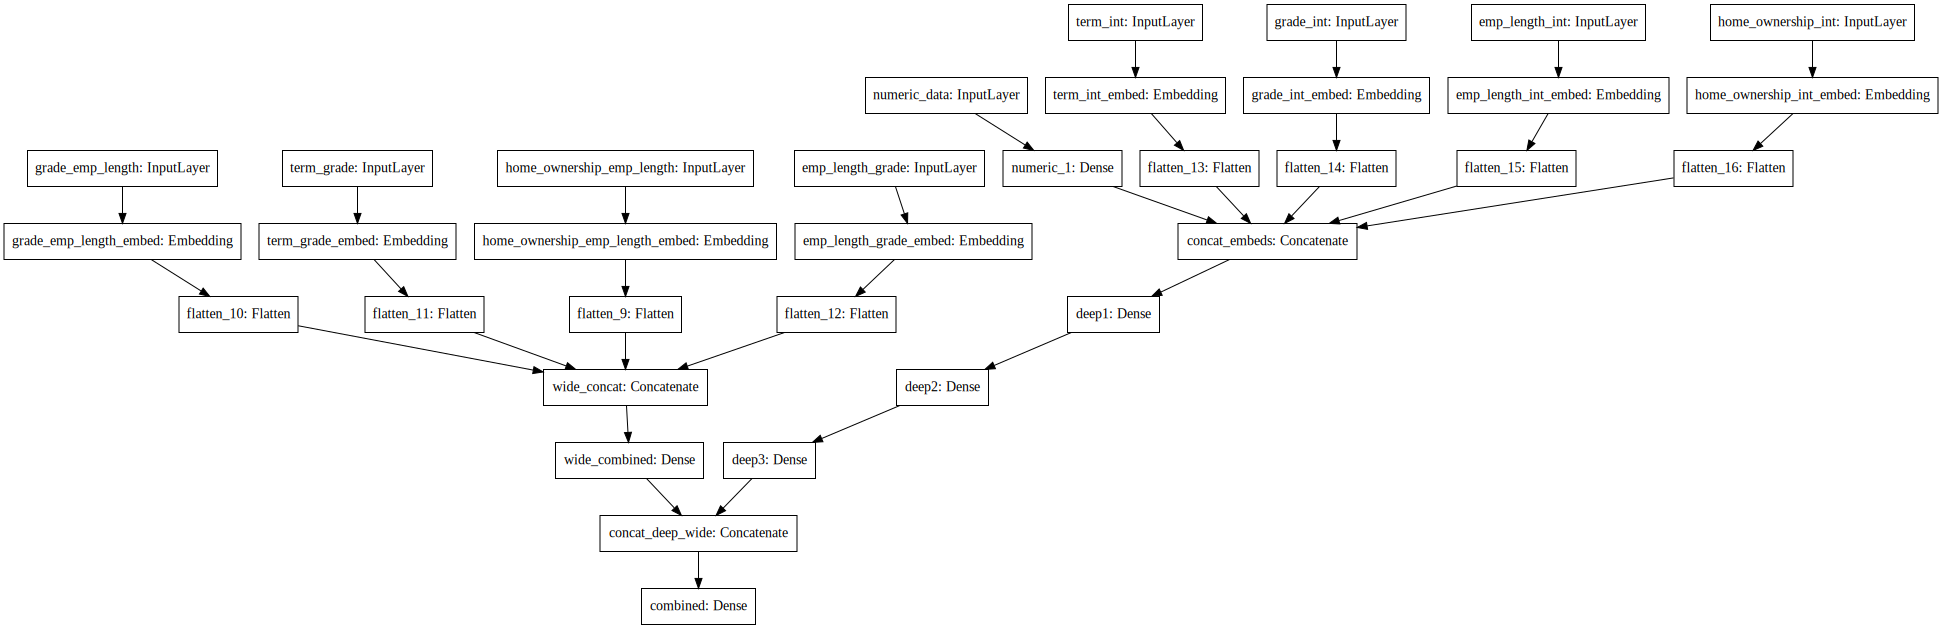

In [24]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model1).create(prog='dot', format='svg'))

In [26]:
%%time

model1.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(X_ints_train + [X_train_num],
          y_train, 
          epochs=10, 
          batch_size=64, 
          verbose=1,
          validation_data=(X_ints_val + [X_val_num], y_val))


Train on 164677 samples, validate on 41170 samples
Epoch 1/10
164677/164677 [==============================] - 11s 67us/step - loss: 0.4873 - acc: 0.7801 - val_loss: 0.4872 - val_acc: 0.7803
Epoch 2/10
164677/164677 [==============================] - 9s 57us/step - loss: 0.4852 - acc: 0.7815 - val_loss: 0.4870 - val_acc: 0.7808
Epoch 3/10
164677/164677 [==============================] - 9s 57us/step - loss: 0.4850 - acc: 0.7815 - val_loss: 0.4872 - val_acc: 0.7807
Epoch 4/10
164677/164677 [==============================] - 9s 57us/step - loss: 0.4848 - acc: 0.7816 - val_loss: 0.4868 - val_acc: 0.7808
Epoch 5/10
164677/164677 [==============================] - 10s 61us/step - loss: 0.4847 - acc: 0.7818 - val_loss: 0.4866 - val_acc: 0.7806
Epoch 6/10
164677/164677 [==============================] - 10s 58us/step - loss: 0.4845 - acc: 0.7817 - val_loss: 0.4866 - val_acc: 0.7809
Epoch 7/10
164677/164677 [==============================] - 9s 56us/step - loss: 0.4845 - acc: 0.7817 - val_los

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

yhat = np.round(model1.predict(X_ints_test + [X_test_num]))
print(mt.confusion_matrix(y_test,yhat), accuracy_score(y_test,yhat))

[[39301   769]
 [10513   879]] 0.7807702770976643


Text(0.5, 0, 'epochs')

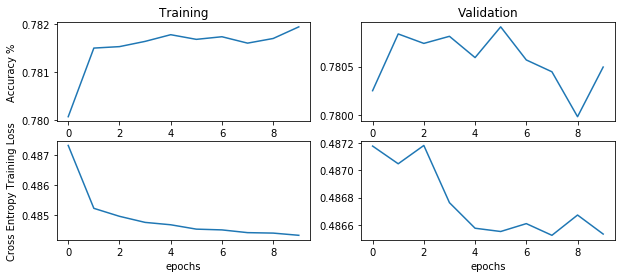

In [28]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history1.history['acc'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history1.history['val_acc'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history1.history['loss'])
plt.ylabel('Cross Entropy Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history1.history['val_loss'])
plt.xlabel('epochs')

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_1 = model1.predict(X_ints_test + [X_test_num]).ravel()

#false positve and true postive rates using roc
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_1)

#area under the curve
auc_1 = auc(fpr_1, tpr_1)

## Wide and Deep Network 2

This second Wide and Deep Newtork puts more focus on the deep numeric layers. This is done by decreasing the size of the wide network by eliminating two of the cross products and also changing the numeric branch of the deep layer from a single layer MLP to a three layer MLP. The final dense layers of the concatenated deep branch is run through a four layer MLP instead of a three layer.

In [30]:

cat_features = ['term_int', 'grade_int', 'emp_length_int','home_ownership_int']
num_features = ['annual_inc','int_rate','loan_amnt']

cross_columns = [['grade', 'emp_length'],
                 ['emp_length','grade']]
 

X_train_num = X_train[num_features]
X_val_num = X_val[num_features]
X_test_num = X_test[num_features]

embed_branches = []
X_ints_train = []
X_ints_val = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []
all_deep_branch_outputs = []

'''WIDE NETWORK'''
#encode cross-product features
for cols in cross_columns:
    
    enc = LabelEncoder()
        
    #join columns names for cross product
    X_cross_train = X_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_cross_val = X_val[cols].apply(lambda x: '_'.join(x), axis=1)
    X_cross_test = X_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    enc.fit(np.hstack((X_cross_train.values,X_cross_val.values, X_cross_test.values)))
    X_cross_train = enc.transform(X_cross_train)
    X_cross_val = enc.transform(X_cross_val)
    X_cross_test = enc.transform(X_cross_test)
    X_ints_train.append(X_cross_train)
    X_ints_val.append(X_cross_val)
    X_ints_test.append(X_cross_test)
    
    #num of categories
    N = max(X_ints_train[-1]+1)
    
    #create embeddings
    inputs = Input(shape=(1,), dtype='int32', name='_'.join(cols))
    all_inputs.append(inputs)
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1, name='_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
#merge wide branches
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=1, activation='sigmoid', name='wide_combined')(wide_branch)

'''DEEP NETWORK'''
for col in cat_features:
    #encode for embedding
    X_ints_train.append(X_train[col].values)
    X_ints_val.append(X_val[col].values)
    X_ints_test.append(X_test[col].values)
    
    #number of categories
    N = max(X_ints_train[-1]+1)
    
    #create embedding branch from num of categories
    inputs = Input(shape=(1,), dtype='int32', name=col)
    all_inputs.append(inputs) #save inputs
    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)),
                               input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)

#dense numeric branch
all_inputs.append(Input(shape=(X_train_num.shape[1],), sparse=False, name='numeric_data'))

x = Dense(units=50, activation='relu', name='numeric_1')(all_inputs[-1])
x = Dense(units=25, activation='relu', name='numeric_2')(x)
x = Dense(units=10, activation='relu', name='numeric_3')(x)
all_deep_branch_outputs.append(x)

deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
deep_branch = Dense(units=100, activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=50, activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=10, activation='relu', name='deep4')(deep_branch)

final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)

model2 = Model(inputs=all_inputs, outputs=final_branch)
                          


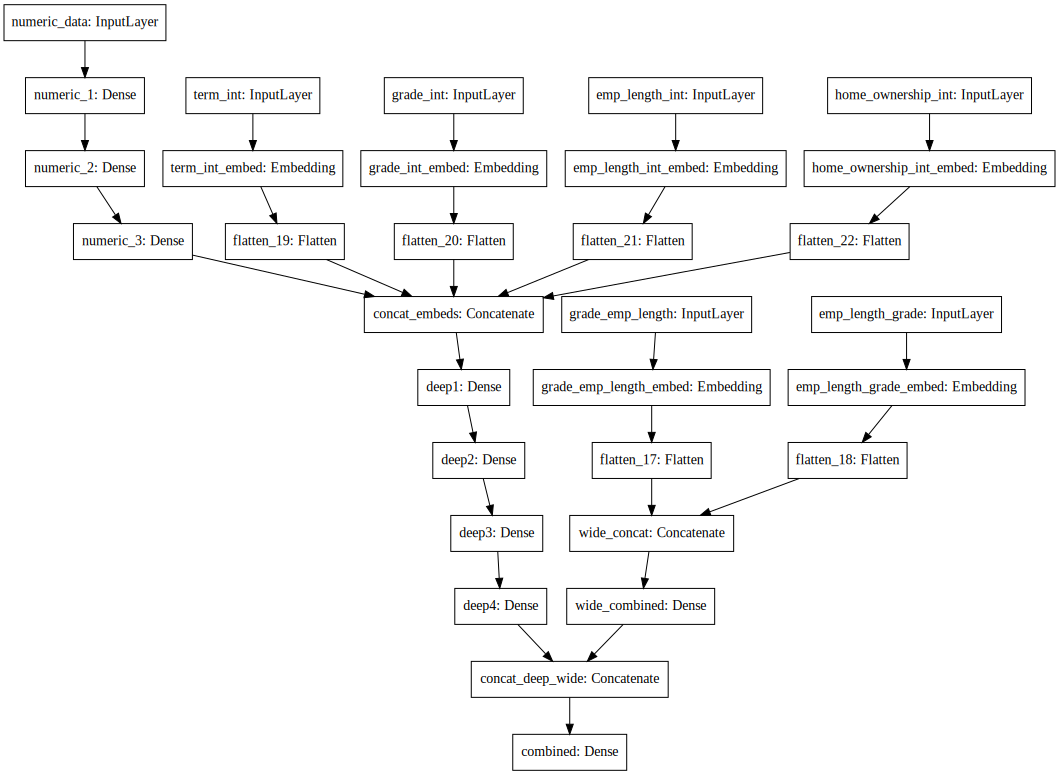

In [31]:
SVG(model_to_dot(model2).create(prog='dot', format='svg'))

In [33]:
%%time

model2.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(X_ints_train + [X_train_num],
          y_train, 
          epochs=10, 
          batch_size=64, 
          verbose=1,
          validation_data=(X_ints_val + [X_val_num], y_val))

Train on 164677 samples, validate on 41170 samples
Epoch 1/10
164677/164677 [==============================] - 14s 82us/step - loss: 0.4860 - acc: 0.7809 - val_loss: 0.4878 - val_acc: 0.7793
Epoch 2/10
164677/164677 [==============================] - 11s 69us/step - loss: 0.4850 - acc: 0.7813 - val_loss: 0.4867 - val_acc: 0.7803
Epoch 3/10
164677/164677 [==============================] - 11s 67us/step - loss: 0.4847 - acc: 0.7817 - val_loss: 0.4866 - val_acc: 0.7804
Epoch 4/10
164677/164677 [==============================] - 11s 67us/step - loss: 0.4845 - acc: 0.7816 - val_loss: 0.4871 - val_acc: 0.7801
Epoch 5/10
164677/164677 [==============================] - 12s 71us/step - loss: 0.4844 - acc: 0.7816 - val_loss: 0.4867 - val_acc: 0.7803
Epoch 6/10
164677/164677 [==============================] - 12s 73us/step - loss: 0.4843 - acc: 0.7819 - val_loss: 0.4866 - val_acc: 0.7797
Epoch 7/10
164677/164677 [==============================] - 12s 72us/step - loss: 0.4842 - acc: 0.7819 - val_

In [34]:
yhat = np.round(model2.predict(X_ints_test + [X_test_num]))
print(mt.confusion_matrix(y_test,yhat), accuracy_score(y_test,yhat))

[[39382   688]
 [10609   783]] 0.7804787998911819


Text(0.5, 0, 'epochs')

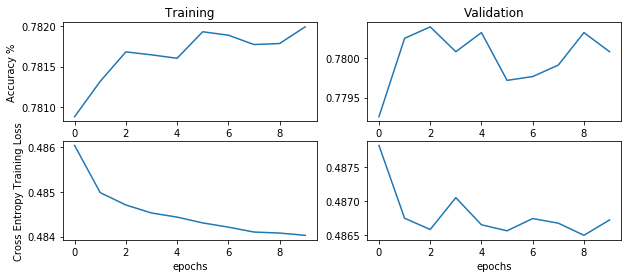

In [35]:
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history2.history['acc'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history2.history['val_acc'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history2.history['loss'])
plt.ylabel('Cross Entropy Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history2.history['val_loss'])
plt.xlabel('epochs')

In [37]:
y_pred_2 = model2.predict(X_ints_test + [X_test_num]).ravel()

#false positve and true postive rates using roc
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred_2)

#area under the curve
auc_2 = auc(fpr_2, tpr_2)

## Wide and Deep Network 3

The third Wide and Deep Network focusses more on the wide branch of the network. This is done by running the cross products through a three layer MLP with sigmoid activation functions in an attempt to prevent relu from losing values that are less than zero. The numeric layers inside of the deep branch are also reduced to a two layer MLP and the final deep layer is reduced to a three layer MLP.

In [38]:

cat_features = ['term_int', 'grade_int', 'emp_length_int','home_ownership_int']
num_features = ['annual_inc','int_rate','loan_amnt']

cross_columns = [['home_ownership','emp_length'],
                 ['grade', 'emp_length'],
                 ['term', 'grade'],
                 ['emp_length','grade']]
 

X_train_num = X_train[num_features]
X_val_num = X_val[num_features]
X_test_num = X_test[num_features]

embed_branches = []
X_ints_train = []
X_ints_val = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []
all_deep_branch_outputs = []

'''WIDE NETWORK'''
#encode cross-product features
for cols in cross_columns:
    
    enc = LabelEncoder()
        
    #join columns names for cross product
    X_cross_train = X_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_cross_val = X_val[cols].apply(lambda x: '_'.join(x), axis=1)
    X_cross_test = X_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    enc.fit(np.hstack((X_cross_train.values,X_cross_val.values, X_cross_test.values)))
    X_cross_train = enc.transform(X_cross_train)
    X_cross_val = enc.transform(X_cross_val)
    X_cross_test = enc.transform(X_cross_test)
    X_ints_train.append(X_cross_train)
    X_ints_val.append(X_cross_val)
    X_ints_test.append(X_cross_test)
    
    #num of categories
    N = max(X_ints_train[-1]+1)
    
    #create embeddings
    inputs = Input(shape=(1,), dtype='int32', name='_'.join(cols))
    all_inputs.append(inputs)
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1, name='_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
#merge wide branches
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=20, activation='sigmoid', name='wide_1')(wide_branch)
wide_branch = Dense(units=10, activation='sigmoid', name='wide_2')(wide_branch)
wide_branch = Dense(units=1, activation='sigmoid', name='wide_combined')(wide_branch)

'''DEEP NETWORK'''
for col in cat_features:
    #encode for embedding
    X_ints_train.append(X_train[col].values)
    X_ints_val.append(X_val[col].values)
    X_ints_test.append(X_test[col].values)
    
    #number of categories
    N = max(X_ints_train[-1]+1)
    
    #create embedding branch from num of categories
    inputs = Input(shape=(1,), dtype='int32', name=col)
    all_inputs.append(inputs) #save inputs
    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)),
                               input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)

#dense numeric branch
all_inputs.append(Input(shape=(X_train_num.shape[1],), sparse=False, name='numeric_data'))

x = Dense(units=20, activation='relu', name='numeric_1')(all_inputs[-1])
x = Dense(units=10, activation='relu', name='numeric_2')(x)
all_deep_branch_outputs.append(x)

deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
deep_branch = Dense(units=50, activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10, activation='relu', name='deep3')(deep_branch)

final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)

model3 = Model(inputs=all_inputs, outputs=final_branch)
                          


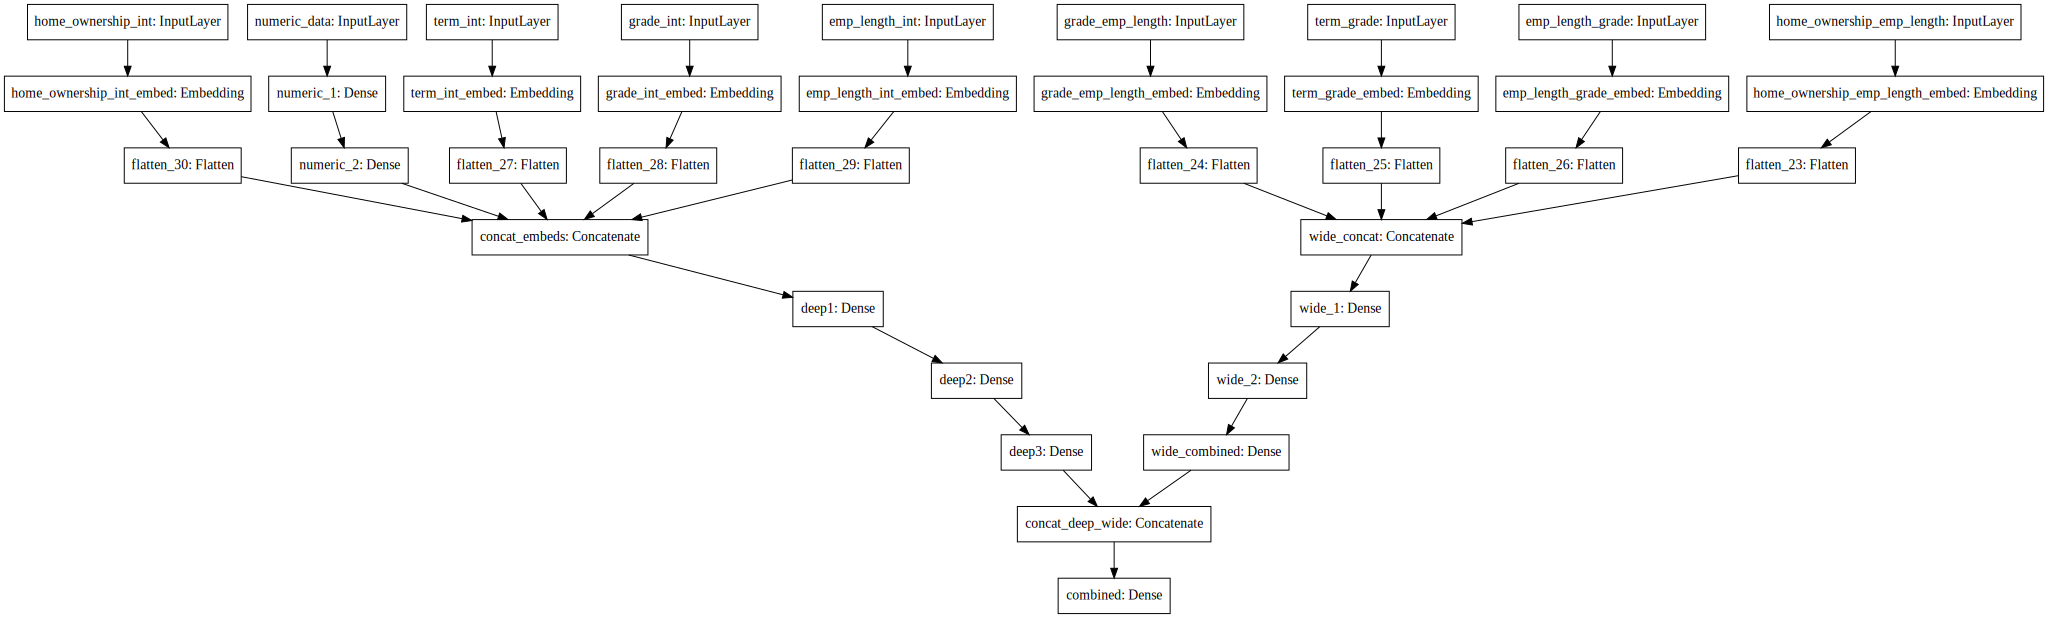

In [39]:
SVG(model_to_dot(model3).create(prog='dot', format='svg'))

In [41]:
%%time

model3.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(X_ints_train + [X_train_num],
          y_train, 
          epochs=10, 
          batch_size=64, 
          verbose=1,
          validation_data=(X_ints_val + [X_val_num], y_val))

Train on 164677 samples, validate on 41170 samples
Epoch 1/10
164677/164677 [==============================] - 15s 92us/step - loss: 0.4875 - acc: 0.7805 - val_loss: 0.4870 - val_acc: 0.7809
Epoch 2/10
164677/164677 [==============================] - 11s 69us/step - loss: 0.4852 - acc: 0.7813 - val_loss: 0.4867 - val_acc: 0.7808
Epoch 3/10
164677/164677 [==============================] - 11s 69us/step - loss: 0.4850 - acc: 0.7817 - val_loss: 0.4870 - val_acc: 0.7798
Epoch 4/10
164677/164677 [==============================] - 12s 73us/step - loss: 0.4849 - acc: 0.7816 - val_loss: 0.4867 - val_acc: 0.7799
Epoch 5/10
164677/164677 [==============================] - 12s 72us/step - loss: 0.4848 - acc: 0.7816 - val_loss: 0.4866 - val_acc: 0.7803
Epoch 6/10
164677/164677 [==============================] - 12s 71us/step - loss: 0.4847 - acc: 0.7816 - val_loss: 0.4866 - val_acc: 0.7804
Epoch 7/10
164677/164677 [==============================] - 11s 70us/step - loss: 0.4847 - acc: 0.7817 - val_

In [44]:

yhat = np.round(model3.predict(X_ints_test + [X_test_num]))
print(mt.confusion_matrix(y_test,yhat), accuracy_score(y_test,yhat))

[[39132   938]
 [10342  1050]] 0.7808091407251952


Text(0.5, 0, 'epochs')

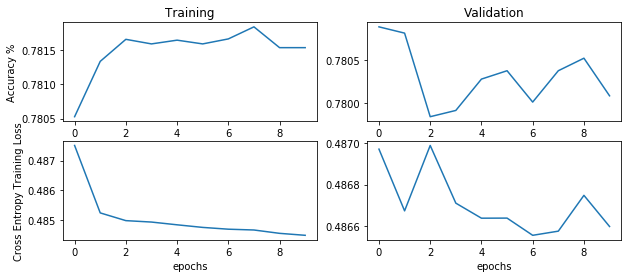

In [45]:
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history3.history['acc'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history3.history['val_acc'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history3.history['loss'])
plt.ylabel('Cross Entropy Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history3.history['val_loss'])
plt.xlabel('epochs')

In [54]:
y_pred_3 = model3.predict(X_ints_test + [X_test_num]).ravel()

#false positve and true postive rates using roc
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_pred_3)

#area under the curve
auc_3 = auc(fpr_3, tpr_3)

## Wide and Deep Network 4

The fourth and final Wide and Deep Network will focus on both the wide and deep branches by using all cross product features and a three layer MLP in the wide branch, while the deep branch runs the numeric data through a four layer MLP and the deep concatenated data through an eight layer MLP. When compiling this model, we will also now optimize the mean squared error loss function.

In [70]:

cat_features = ['term_int', 'grade_int', 'emp_length_int','home_ownership_int']
num_features = ['annual_inc','int_rate','loan_amnt']

cross_columns = [['home_ownership','emp_length'],
                 ['grade', 'emp_length'],
                 ['term', 'grade'],
                 ['emp_length','grade']]
embeddings = []

X_train_num = X_train[num_features]
X_val_num = X_val[num_features]
X_test_num = X_test[num_features]

embed_branches = []
X_ints_train = []
X_ints_val = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []
all_deep_branch_outputs = []

'''WIDE NETWORK'''
#encode cross-product features
for cols in cross_columns:
    
    enc = LabelEncoder()
        
    #join columns names for cross product
    X_cross_train = X_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_cross_val = X_val[cols].apply(lambda x: '_'.join(x), axis=1)
    X_cross_test = X_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    enc.fit(np.hstack((X_cross_train.values,X_cross_val.values, X_cross_test.values)))
    X_cross_train = enc.transform(X_cross_train)
    X_cross_val = enc.transform(X_cross_val)
    X_cross_test = enc.transform(X_cross_test)
    X_ints_train.append(X_cross_train)
    X_ints_val.append(X_cross_val)
    X_ints_test.append(X_cross_test)
    
    #num of categories
    N = max(X_ints_train[-1]+1)
    
    #create embeddings
    inputs = Input(shape=(1,), dtype='int32', name='_'.join(cols))
    all_inputs.append(inputs)
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1, name='_'.join(cols)+'_embed')(inputs)
    
    embeddings.append(x) #save embeddings for dimensionality reduction
    
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
#merge wide branches
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=20, activation='relu', name='wide_1')(wide_branch)
wide_branch = Dense(units=10, activation='relu', name='wide_2')(wide_branch)
wide_branch = Dense(units=1, activation='sigmoid', name='wide_combined')(wide_branch)

'''DEEP NETWORK'''
for col in cat_features:
    #encode for embedding
    X_ints_train.append(X_train[col].values)
    X_ints_val.append(X_val[col].values)
    X_ints_test.append(X_test[col].values)
    
    #number of categories
    N = max(X_ints_train[-1]+1)
    
    #create embedding branch from num of categories
    inputs = Input(shape=(1,), dtype='int32', name=col)
    all_inputs.append(inputs) #save inputs
    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)),
                               input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)

#dense numeric branch
all_inputs.append(Input(shape=(X_train_num.shape[1],), sparse=False, name='numeric_data'))

x = Dense(units=100, activation='relu', name='numeric_1')(all_inputs[-1])
x = Dense(units=75, activation='relu', name='numeric_2')(x)
x = Dense(units=35, activation='relu', name='numeric_3')(x)
x = Dense(units=10, activation='relu', name='numeric_4')(x)
all_deep_branch_outputs.append(x)

deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
deep_branch = Dense(units=200, activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=150, activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=100, activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=75, activation='relu', name='deep4')(deep_branch)
deep_branch = Dense(units=50, activation='relu', name='deep5')(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep6')(deep_branch)
deep_branch = Dense(units=15, activation='relu', name='deep7')(deep_branch)
deep_branch = Dense(units=10, activation='relu', name='deep8')(deep_branch)

final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)

model4 = Model(inputs=all_inputs, outputs=final_branch)
                          


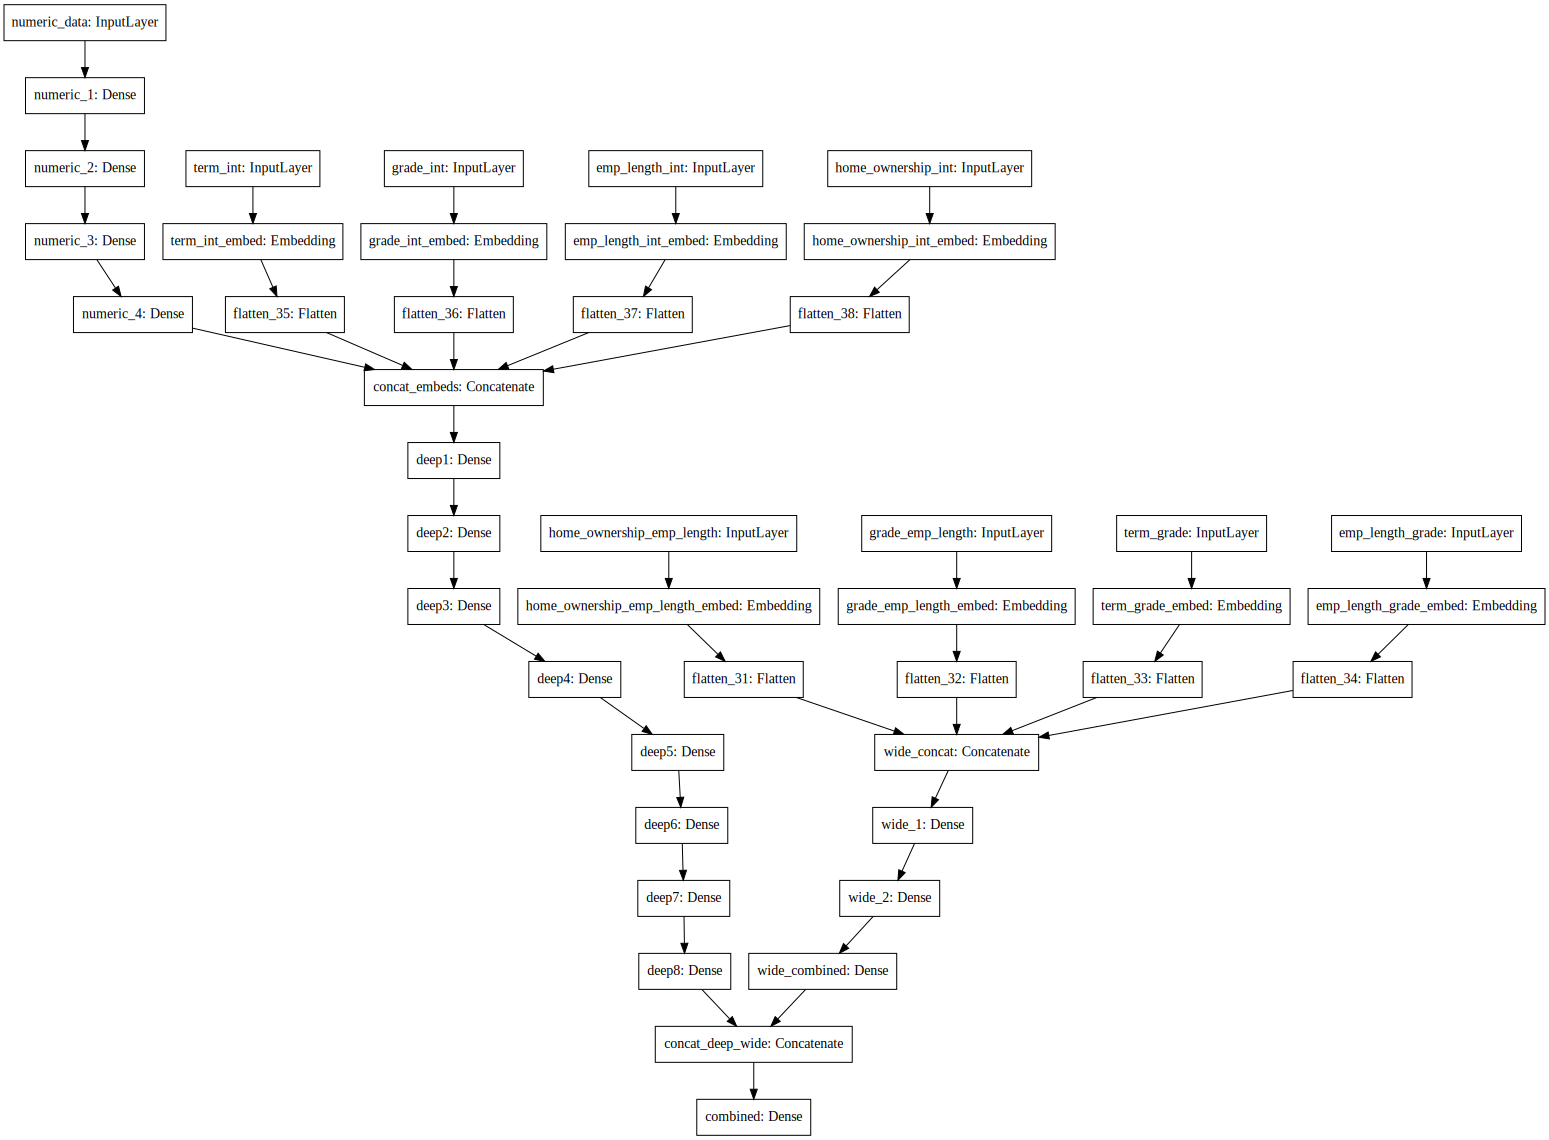

In [48]:
SVG(model_to_dot(model4).create(prog='dot', format='svg'))

In [49]:
%%time

model4.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

history4 = model4.fit(X_ints_train + [X_train_num],
          y_train, 
          epochs=10, 
          batch_size=100, 
          verbose=1,
          validation_data=(X_ints_val + [X_val_num], y_val))

Train on 164677 samples, validate on 41170 samples
Epoch 1/10
164677/164677 [==============================] - 14s 87us/step - loss: 0.1584 - acc: 0.7797 - val_loss: 0.1583 - val_acc: 0.7803
Epoch 2/10
164677/164677 [==============================] - 12s 70us/step - loss: 0.1574 - acc: 0.7813 - val_loss: 0.1579 - val_acc: 0.7796
Epoch 3/10
164677/164677 [==============================] - 12s 71us/step - loss: 0.1572 - acc: 0.7815 - val_loss: 0.1578 - val_acc: 0.7811
Epoch 4/10
164677/164677 [==============================] - 12s 72us/step - loss: 0.1572 - acc: 0.7818 - val_loss: 0.1578 - val_acc: 0.7809
Epoch 5/10
164677/164677 [==============================] - 12s 72us/step - loss: 0.1571 - acc: 0.7819 - val_loss: 0.1580 - val_acc: 0.7793
Epoch 6/10
164677/164677 [==============================] - 12s 72us/step - loss: 0.1570 - acc: 0.7819 - val_loss: 0.1578 - val_acc: 0.7798
Epoch 7/10
164677/164677 [==============================] - 12s 72us/step - loss: 0.1570 - acc: 0.7820 - val_

In [50]:

yhat = np.round(model4.predict(X_ints_test + [X_test_num]))
print(mt.confusion_matrix(y_test,yhat), accuracy_score(y_test,yhat))

[[39131   939]
 [10343  1049]] 0.7807702770976643


Text(0.5, 0, 'epochs')

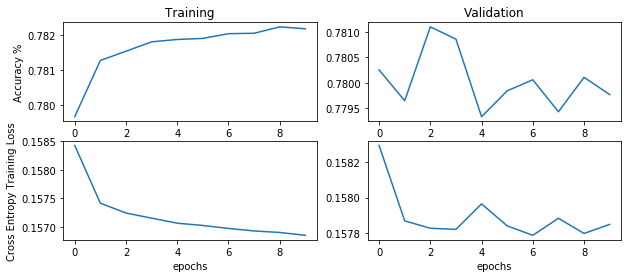

In [52]:

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history4.history['acc'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history4.history['val_acc'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history4.history['loss'])
plt.ylabel('Cross Entropy Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history4.history['val_loss'])
plt.xlabel('epochs')

In [53]:
y_pred_4 = model4.predict(X_ints_test + [X_test_num]).ravel()

#false positve and true postive rates using roc
fpr_4, tpr_4, thresholds_4 = roc_curve(y_test, y_pred_4)

#area under the curve
auc_4 = auc(fpr_4, tpr_4)

## Comparing Wide and Deep Models

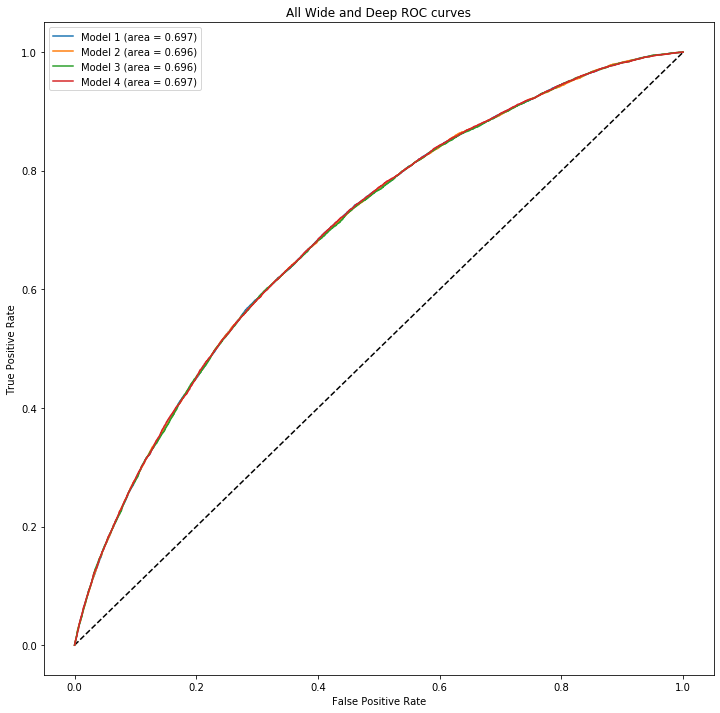

In [59]:
plt.figure(figsize=(12,12))

#plot halfway line
plt.plot([0,1], [0,1], 'k--')

#plot model 1 ROC
plt.plot(fpr_1, tpr_1, label='Model 1 (area = {:.3f})'.format(auc_1))

#plot model 2 ROC
plt.plot(fpr_2, tpr_2, label='Model 2 (area = {:.3f})'.format(auc_2))

#plot model 3 ROC
plt.plot(fpr_3, tpr_3, label='Model 3 (area = {:.3f})'.format(auc_3))

#plot model 4 ROC
plt.plot(fpr_4, tpr_4, label='Model 4 (area = {:.3f})'.format(auc_4))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All Wide and Deep ROC curves')
plt.legend(loc='best')
plt.show()


When plotting the ROC curve for each model, we see that there is virtually no difference in the performance of the models. These models likely perform very similar due to the nature of the data. The features that we chose provide ample evidence in predicting delinquency therefore and combination of these works well with the predictions. Another explanation for the similar performace could be that the features we chose are very correlated with each other resulting in all of the models, no matter the combination of features, will perform the same. Therefore, we will choose model 4 to compare against the Sklearn MLP, simply because of its .001 difference from the other models. 

## Comparison to Sklearn MLP

Here we will compare our best performing Wide and Deep Network with Sklearn's MLP implementation. Since our fourth Wide and Deep model slightly outperformed the other three, we will use it to compare against the Sklearn MLP.

### Sklearn Multilayer Perceptron

In [57]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,),
                    learning_rate_init=0.01,
                    random_state=1,
                    activation='relu')

mlp.fit(X_train[cat_features+num_features], y_train)
yhat = mlp.predict(X_test[cat_features+num_features])

print("MLP Accuracy Score: ", accuracy_score(y_test, yhat))

#y_pred_sk = mlp.predict(X_ints_test + [X_test_num]).ravel()

#false positve and true postive rates using roc
fpr_sk, tpr_sk, thresholds_sk = roc_curve(y_test, yhat)

#area under the curve
auc_sk = auc(fpr_sk, tpr_sk)

MLP Accuracy Score:  0.7801290272434029


#### Wide and Deep Network vs Multilayer Perceptron

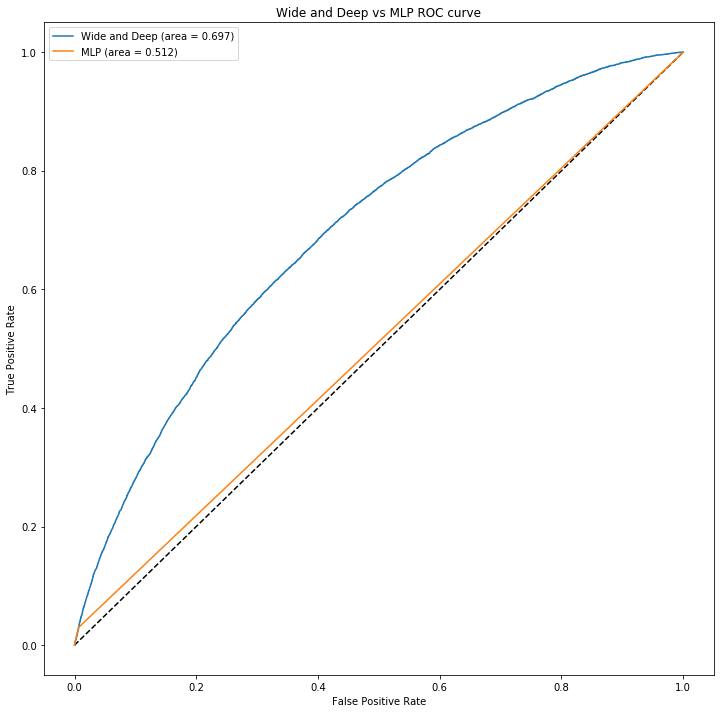

In [58]:
plt.figure(figsize=(12,12))

#plot halfway line
plt.plot([0,1], [0,1], 'k--')

#plot Wide and Deep ROC
plt.plot(fpr_4, tpr_4, label='Wide and Deep (area = {:.3f})'.format(auc_4))

#plot MLP ROC
plt.plot(fpr_sk, tpr_sk, label='MLP (area = {:.3f})'.format(auc_sk))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Wide and Deep vs MLP ROC curve')
plt.legend(loc='best')
plt.show()

From the ROC curve above, we can conclude that the Wide and Deep Neural Network outperformed the standard Multilayer Perceptron. The Wide and Deep network had an ROC curve that is closer to the top left than the MLP curve. When comparing the Area Under the Curves for the models, we clearly see that with an AUC of 0.697, the Wide and Deep network outperforms the MLP with an AUC of 0.512. The MLP is essentially predicting at chance.

## Visualizing Embedding Weights for Wide and Deep Networks

In [104]:
from sklearn.manifold import TSNE

#extract weight embeddings for deep branch
weight_embeddings = []
for l in model4.layers:
    if '_embed' in l.name and l.name[:-6] in cat_features:
        print(l.name)
        weight_embeddings.append(l.get_weights())

#extract weight vectors out of lists
weight_embeddings = [w[0] for w in weight_embeddings]

term_int_embed
grade_int_embed
emp_length_int_embed
home_ownership_int_embed


### Visualizing Embedded Weights using t-SNE

In [133]:
#perform t-sne on embedded weights
tsne = TSNE(n_components=2, random_state=2, verbose=1)

reduced_weights = []
for embedding in weight_embeddings:
    tsne_weights = tsne.fit_transform(embedding)
    reduced_weights.append(tsne_weights)

[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 2 samples in 0.000s...
[t-SNE] Computed neighbors for 2 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 2 / 2
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 29.818880
[t-SNE] KL divergence after 300 iterations: 0.000000
[t-SNE] Computing 6 nearest neighbors...
[t-SNE] Indexed 7 samples in 0.000s...
[t-SNE] Computed neighbors for 7 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 7 / 7
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.602459
[t-SNE] KL divergence after 500 iterations: 0.158649
[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 11 samples in 0.000s...
[t-SNE] Computed neighbors for 11 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 11 / 11
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergen

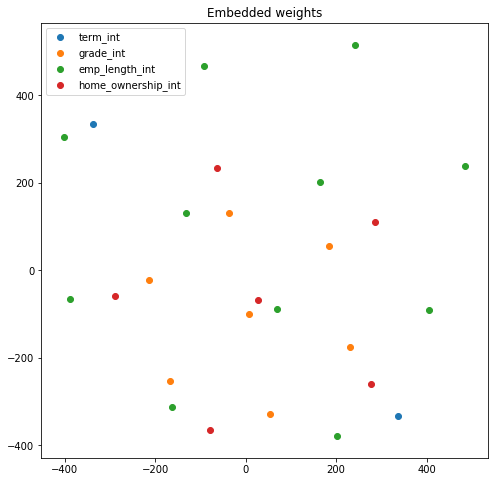

In [150]:
#plot embedded weights after t-sne
plt.figure(figsize=(8, 8))
for i, w in enumerate(reduced_weights):    
    plt.scatter(w[:,0], w[:,1], label=cat_features[i])

plt.title('Embedded weights')
plt.legend(loc='best')
plt.show()

After performing t-SNE dimensionality reduction on the embedded weights for our categorical variables, we are able to visualize them in two dimensions. Some features, such as the emp_length, have values that are distributed throughout the entire plot, while others, such as grade, are focussed into certain clusters. The grade and the home_ownership clusters, denoted by the yellow and red dots respectively, are relatively close to one another. This similarity in the feature space suggests that these two features are related to one another, when predicting delinquent loans. The evenly spread out emp_length cluster, denoted by the green dots, suggests that it is unclear if this feature is related to the other features. 

### Embedded Weight Averages

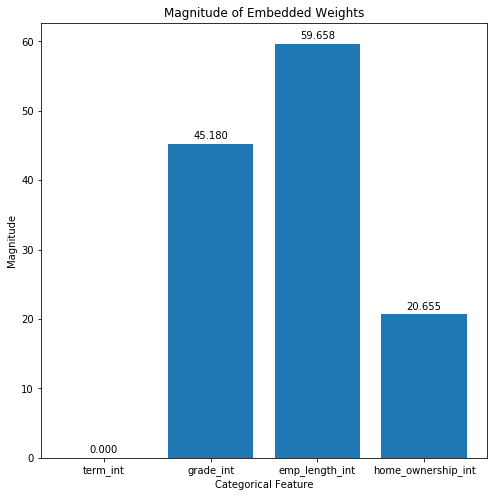

In [167]:
#plot embedded weights after t-sne
fig, ax = plt.subplots(figsize=(8,8))#figure(figsize=(8, 8))


#compute magnitude of  weight values
mean_weights = [np.absolute(np.mean(w)) for w in reduced_weights]
bar = ax.bar(range(len(reduced_weights)), mean_weights)

ax.set_title('Magnitude of Embedded Weights')
ax.set_xlabel('Categorical Feature')
ax.set_ylabel('Magnitude')
ax.set_xticks(range(len(reduced_weights)))
ax.set_xticklabels(cat_features)

'''Taken from reference [3]'''
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar)
plt.show()

Here we can clearly see the magnitude of the embedded weights for the deep branch of our network. The emp_length feature had the largest magnitude, meaning that the feature is a good predictor for loan frequency. The term feature's weights, however, were reduced to zero, indicating that term had little power in predicting delinquent loans. 

#### References

- [1] https://www.sas.com/en_us/insights/risk-management/credit-risk-management.html
- [2] https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
- [3] https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py